Mittelwert Untergrund:  3.0816326530612246 
Fehler: 0.26426283833526903


fit uhne untergrundfehler


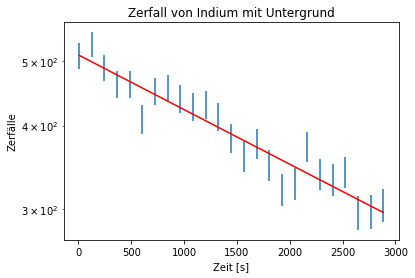

A1 = 508.09172258852465 , Standardfehler =  9.52042197015746
l1 = 0.00019081190446842188 , Standardfehler =  1.2024326225056631e-05
chi2= 23.658533241233545
chi2_red= 1.1265968210111212
Wahrscheinlichkeit=31.0%


fit mit addiertem fehler auf untergrund


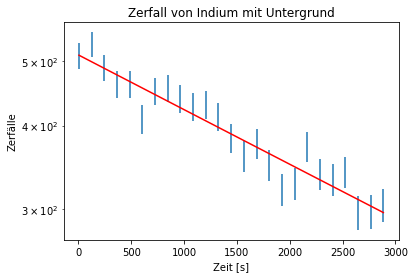

A1 = 507.8349095086547 , Standardfehler =  9.521075590862798
l1 = 0.00019094284949796366 , Standardfehler =  1.203255318896881e-05
chi2= 23.657854132017402
chi2_red= 1.1265644824770191
Wahrscheinlichkeit=31.0%


fit mit subtrahiertem fehler auf untergrund


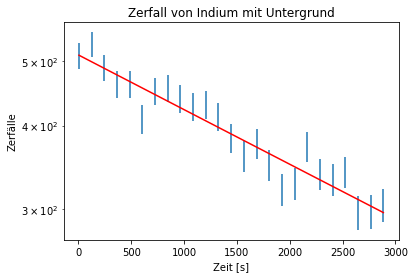

A1 = 508.3485442659273 , Standardfehler =  9.51976927005196
l1 = 0.0001906811368352124 , Standardfehler =  1.201611102188807e-05
chi2= 23.65921275675474
chi2_red= 1.126629178893083
Wahrscheinlichkeit=31.0%
0.00019081190446842188 1.2024326225056631e-05
Fehler l1: 1.2025038234702032e-05


<Figure size 432x288 with 0 Axes>

In [40]:
# coding: utf-8

# In[11]:

get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
unterg =np.loadtxt(r"Untergrundagms.dat", usecols=[1])

##berechnung der untergrundstrahlung
mittelw_ug=np.mean(unterg)
fehler_ug=np.std(unterg)/np.sqrt(len(unterg))
print("Mittelwert Untergrund: ", mittelw_ug, "\nFehler:", fehler_ug)


# In[34]:
##berechnnung und fitten des indiumzerfalls
y0=mittelw_ug
N= np.loadtxt(r"indium.dat", usecols=[1])[1:]
Fehler_N=np.sqrt(N)
t=np.arange(5,25*120+5,120)

def fit_stuff(y0):
    plt.errorbar(t, N, yerr=Fehler_N, linestyle="None")
    plt.xlabel("Zeit [s]")
    plt.ylabel("Zerfälle")
    plt.yscale("log")
    plt.title("Zerfall von Indium mit Untergrund")
    def fit_func(x, A1, l1):
        return A1*np.exp(-x*l1)+y0
    popt, pcov=optimize.curve_fit(fit_func, t, N, p0=[500,0.02], sigma=Fehler_N)
    plt.plot(t, fit_func(t, *popt), color="red")
    plt.show()
    plt.savefig(r"indium.pdf", format="pdf")
    names=["A1", "l1", "A2", "l2"]
    for x in range(len(popt)):
        print(names[x],"=",popt[x], ", Standardfehler = ", np.sqrt(pcov[x][x]))


    # In[36]:
    ##berechnung der chi2 summe
    chi2_=np.sum((fit_func(t, *popt)-N)**2/Fehler_N**2)
    dof=len(N)-4##degrees of freedom
    chi2_red=chi2_/dof
    print("chi2=", chi2_)
    print("chi2_red=", chi2_red)


    # In[38]:
    ##berechnung der fitwahrscheinlichkeit
    from scipy.stats import chi2
    prob=round(1-chi2.cdf(chi2_, dof),2)*100
    print("Wahrscheinlichkeit="+str(prob)+"%")
    return (popt[1], np.sqrt(pcov[1][1]))

print("\n\nfit uhne untergrundfehler")
l1, error_l1=fit_stuff(y0)
print("\n\nfit mit addiertem fehler auf untergrund")
l1p,  error_l1p=fit_stuff(y0+fehler_ug)
print("\n\nfit mit subtrahiertem fehler auf untergrund")
l1m,  error_l1m=fit_stuff(y0-fehler_ug)

print(l1, error_l1)
error_l1=np.sqrt(error_l1**2+(np.abs(l1p-l1)+np.abs(l1m-l1))**2/4)
print("Fehler l1:", error_l1)


# In[ ]:


